**Import Libraries and Generate Synthetic Dataset**

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Generation
np.random.seed(42)
num_samples = 1000

data = {
    "MonthlyCharges": np.random.uniform(20, 120, num_samples),
    "Tenure": np.random.randint(1, 72, num_samples),
    "Age": np.random.randint(18, 80, num_samples),
    "ContractType": np.random.choice(["Month-to-month", "One year", "Two year"], num_samples)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode Contract Type
df["ContractType"] = df["ContractType"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})

# Generate Churn with added noise
df["Churn"] = ((df["MonthlyCharges"] > 60) & (df["Tenure"] < 24) & (df["ContractType"] == 0)).astype(int)
df["Churn"] = np.where(np.random.rand(num_samples) > 0.85, 1 - df["Churn"], df["Churn"])

# Display first few rows
print(df.head())


   MonthlyCharges  Tenure  Age  ContractType  Churn
0       57.454012      47   61             1      0
1      115.071431      12   22             0      1
2       93.199394      62   20             2      0
3       79.865848       8   18             0      1
4       35.601864      21   21             0      0


**Data Preprocessing**

In [5]:
# Features and target variable are separated
X = df.drop("Churn", axis=1)
y = df["Churn"]

**Train-Test Split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Train the Model**

In [8]:
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

**Evaluate Model Performance**

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       238
           1       0.78      0.11      0.20        62

    accuracy                           0.81       300
   macro avg       0.79      0.55      0.54       300
weighted avg       0.80      0.81      0.75       300



**Visualize model peroformance and error**

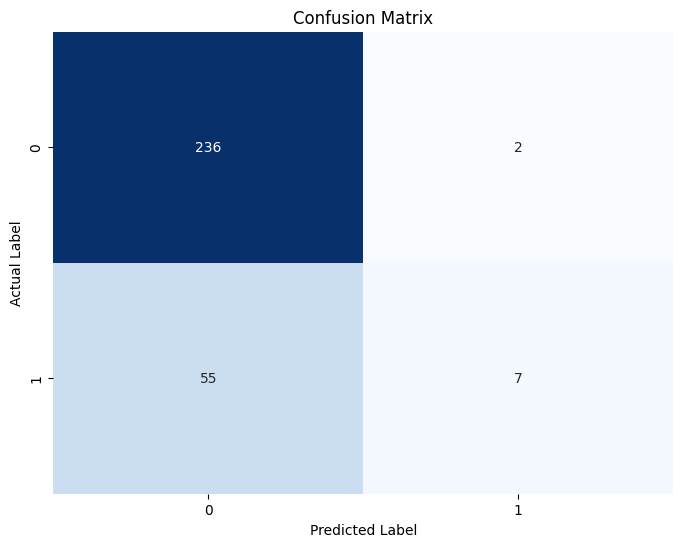

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


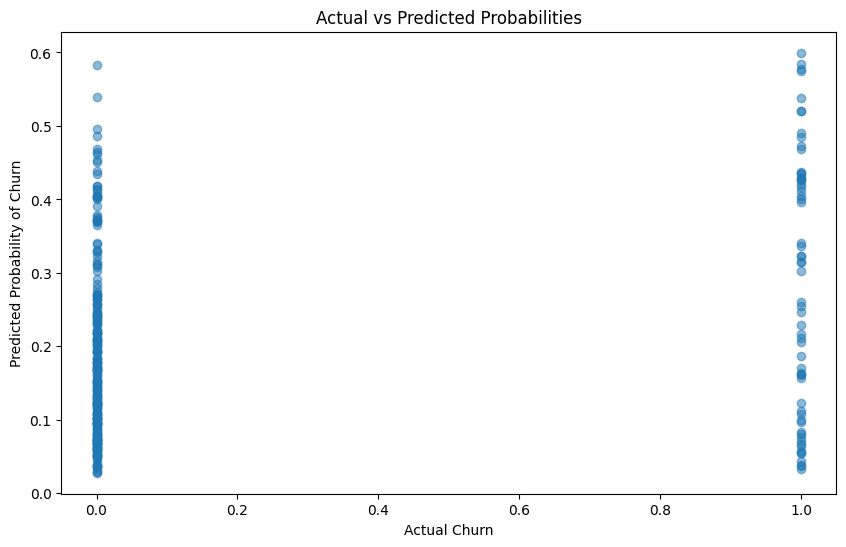

In [11]:
# predicted vs actual probabilities
y_probs = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_probs, alpha=0.5)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Probability of Churn")
plt.title("Actual vs Predicted Probabilities")
plt.show()


In [12]:
new_data = pd.DataFrame({
    "MonthlyCharges": [55],
    "Tenure": [10],
    "Age": [30],
    "ContractType": [0]  # Month-to-month
})

new_pred_prob = model.predict_proba(new_data)[:, 1]
new_pred_label = model.predict(new_data)

print(f"Predicted Probability of Churn: {new_pred_prob[0]:.2f}")
print(f"Predicted Churn Label: {new_pred_label[0]}")


Predicted Probability of Churn: 0.32
Predicted Churn Label: 0
